In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def clear():
    folder_path = './data_IR'
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".xlsx"):
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_excel(file_path)
            # clean columns
            df[df.columns[0]] = df[df.columns[0]].apply(lambda x: x.strip() if isinstance(x, str) else x)
            # clean first row
            df.columns = df.columns.to_series().apply(lambda x: x.strip() if isinstance(x, str) else x)
            # create new dataframe
            df = df[df.columns[0]].to_frame().join(df.loc[:, ~df.columns.str.contains("Unnamed")])
            df.rename(columns={df.columns[0]: ""}, inplace=True)
            df.to_excel(file_path, index=False)


In [19]:
def trans():
    folder_path = os.path.join(os.getcwd(), "data_IR")
    output_path = os.path.join(os.getcwd(), 'output/resultIR.xlsx')

    data = pd.DataFrame(columns=['Year', 'Crop Type', 'Crop', 'Fungicide', 'Hectares', 'Active Substance'])

    data1 = []
    data2 = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith('.xlsx'):
            parts = file_name.split("_")
            year = parts[-2]
            crop_type = '_'.join(parts[0:-2])
            table_type = parts[-1].split(".")[0]

            df = pd.read_excel(os.path.join(folder_path, file_name), header=0, index_col=0)


            for fungicide in df.index:
                for crop in df.columns:
                    value = str(df.loc[fungicide, crop])

                    if isinstance(value, str):
                        value = value.replace(",", "").split(".")[0].replace("<", "0")
                        try:
                            value = float(value)
                        except ValueError:
                            value = 0.0
                    else:
                        print(value)

                    if pd.notna(value):
                        if table_type == "ha":
                            data1.append([year, crop_type, crop, fungicide, value])
                        elif table_type == "ac":
                            data2.append([year, crop_type, crop, fungicide, value])

    df1 = pd.DataFrame(data1, columns=['Year', 'Crop Type', 'Crop', 'Fungicide', 'Hectares'])
    df2 = pd.DataFrame(data2, columns=['Year', 'Crop Type', 'Crop', 'Fungicide', 'Active Substance'])

    df_all = pd.merge(df1, df2, how="inner", on=['Year', 'Crop Type', 'Crop', 'Fungicide'])

    # if os.path.exists(output_path):
    #     os.remove(output_path)
    # else:
    #     os.makedirs(os.path.dirname(output_path), exist_ok=True)

    df_all.to_excel(output_path, index=False)


In [6]:
clear()
trans()

In [7]:
df = pd.read_excel("output/resultIR.xlsx")
df.columns

Index(['Year', 'Crop Type', 'Crop', 'Fungicide', 'Hectares',
       'Active Substance'],
      dtype='object')

In [8]:
df["Fungicide"].value_counts()

Fungicide
Allfungicides                           379
Azoxystrobin                            354
Chlorothalonil                          310
Fenpropimorph                           298
Tebuconazole                            295
                                       ... 
Bixafen/prothioconazole/tebuconazole      3
Potassiumphosphonates                     3
Lime                                      2
Dinocap                                   2
Flutolanil                                2
Name: count, Length: 217, dtype: int64

In [9]:
df.loc[df['Crop Type'].str.contains('Arable', case=False), 'Crop Type'] = 'Arable_crops'
df.loc[df['Crop Type'].str.contains('Grassland|Grassl', case=False), 'Crop Type'] = 'Grassland_fodder_crops'
df.loc[df['Crop Type'].str.contains('Protected', case=False), 'Crop Type'] = 'Protected_crops'
df.loc[df['Crop Type'].str.contains('Soft', case=False), 'Crop Type'] = 'Soft_fruit'
df.loc[df['Crop Type'].str.contains('Top', case=False), 'Crop Type'] = 'Top_soft_fruit'
df.loc[df['Crop Type'].str.contains('vegetable', case=False), 'Crop Type'] = 'Outdoor_vegetable_crops'
df['Crop Type'].unique()

array(['Arable_crops', 'Protected_crops', 'Grassland_fodder_crops',
       'Outdoor_vegetable_crops', 'Soft_fruit', 'Top_soft_fruit'],
      dtype=object)

In [10]:
data1=df[df["Crop Type"]=="Arable_crops"].to_excel("temp_data_IR/Arable_crops.xlsx")
data2=df[df["Crop Type"]=="Protected_crops"].to_excel("temp_data_IR/Protected_crops.xlsx")
data3=df[df["Crop Type"]=="Grassland_fodder_crops"].to_excel("temp_data_IR/Grassland_fodder_crops.xlsx")
data4=df[df["Crop Type"]=="Outdoor_vegetable_crops"].to_excel("temp_data_IR/Outdoor_vegetable_crops.xlsx")
data8=df[df["Crop Type"]=="Top_soft_fruit"].to_excel("temp_data_IR/Top_soft_fruit.xlsx")
data9=df[df["Crop Type"]=="Soft_fruit"].to_excel("temp_data_IR/Soft_fruit.xlsx")

## clean data 

In [13]:
df.dropna(subset=["Fungicide"], inplace=True)
print(f'count data: {len(df)}')

df.loc[df["Fungicide"].str.contains('other Fungicide', case=False), 'Fungicide'] = 'Other Fungicide'
df.loc[df["Fungicide"].str.contains('all Fungicide', case=False), 'Fungicide'] = 'all Fungicide'
df.loc[df["Fungicide"].str.contains('otherFungicide', case=False), 'Fungicide'] = 'Other Fungicide'
df.loc[df["Fungicide"].str.contains('allFungicide', case=False), 'Fungicide'] = 'all Fungicide'


df = df[~df['Fungicide'].str.contains('Other Fungicide|all Fungicide', case=False)]
df = df[~df['Crop'].str.contains('Allcrops|Allcrops\\(spha\\)|Allcrops\\(kg\\)|Totalquantity\\(kg\\)|Totalarea\\(spha\\)|Totalquantity|Totalarea', case=False, regex=True)]

print(f'count data after cleaning: {len(df)}')


count data: 12917
count data after cleaning: 12917


In [12]:
df["Crop Type"].value_counts()

Crop Type
Arable_crops               9228
Outdoor_vegetable_crops    1706
Grassland_fodder_crops      743
Soft_fruit                  480
Top_soft_fruit              469
Protected_crops             291
Name: count, dtype: int64

## EDA

**Relationship between different crop type reports and years**

In [43]:
df.head()

,Year,Crop Type,Crop,Fungicide,Hectares,Active Substance
0,2000,Arable_crops,Springbarley,Azoxystrobin,2731,449
1,2000,Arable_crops,Undersownbarley,Azoxystrobin,0,0
2,2000,Arable_crops,Winterbarley,Azoxystrobin,1946,353
3,2000,Arable_crops,Springwheat,Azoxystrobin,166,31
4,2000,Arable_crops,Winterwheat,Azoxystrobin,3861,621


In [45]:
df.isna().sum()

Year                0
Crop Type           0
Crop                0
Fungicide           0
Hectares            0
Active Substance    0
dtype: int64

In [70]:
year_col = df["Year"]
crop_type_col = df["Crop Type"]

In [62]:
years = df["Year"].unique()
crop_types = df["Crop Type"].unique()
valid_combinations = df.drop_duplicates(subset=["Year", "Crop Type"])

In [73]:
from itertools import product
all_combinations = pd.DataFrame(list(product(years, crop_types)), columns=["Year", "Crop Type"])
all_combinations["Exists"] = all_combinations.apply(lambda row: not valid_combinations[(df["Year"] == row["Year"]) & (df["Crop Type"] == row["Crop Type"])].empty, axis=1)


C:\Windows\Temp\ipykernel_20688\3760559454.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_combinations["Exists"] = all_combinations.apply(lambda row: not valid_combinations[(df["Year"] == row["Year"]) & (df["Crop Type"] == row["Crop Type"])].empty, axis=1)
C:\Windows\Temp\ipykernel_20688\3760559454.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_combinations["Exists"] = all_combinations.apply(lambda row: not valid_combinations[(df["Year"] == row["Year"]) & (df["Crop Type"] == row["Crop Type"])].empty, axis=1)
C:\Windows\Temp\ipykernel_20688\3760559454.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_combinations["Exists"] = all_combinations.apply(lambda row: not valid_combinations[(df["Year"] == row["Year"]) & (df["Crop Type"] == row["Crop Type"])].empty, axis=1)
C:\Windows\Temp\ipykernel_20688\3760559454.py:3: UserWarning: Boolean Series key will be reindexed to matc

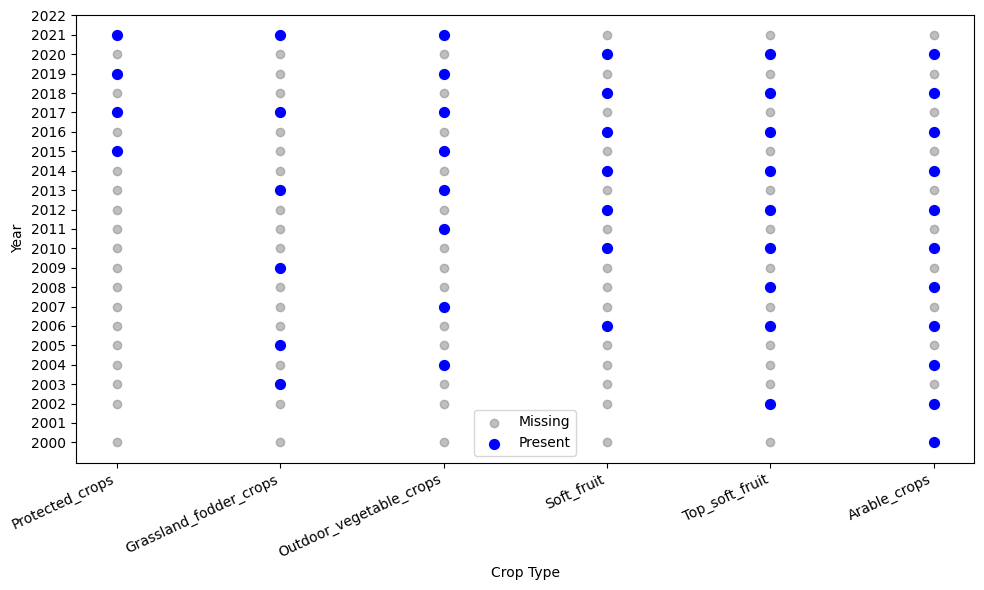

In [84]:
plt.figure(figsize=(10, 6))
# Scatter plot for non-existent combinations (gray)
missing_combinations = all_combinations[~all_combinations["Exists"]]

plt.scatter(missing_combinations["Crop Type"], missing_combinations["Year"], color="gray", alpha=0.5, label="Missing")
# Scatter plot for existent combinations (blue)
existing_combinations = all_combinations[all_combinations["Exists"]]
plt.scatter(existing_combinations["Crop Type"], existing_combinations["Year"], color="blue", s= 50, label="Present")

plt.xlabel('Crop Type')
plt.ylabel('Year')
plt.yticks(range(2000, 2023))
plt.xticks(rotation=25, ha='right')
plt.legend()

plt.tight_layout()
plt.savefig('output/Year_Crop_Type.png', dpi=1000)
plt.show()

**Relationship between year and fungicide use**

In [86]:
df.head()

,Year,Crop Type,Crop,Fungicide,Hectares,Active Substance
0,2000,Arable_crops,Springbarley,Azoxystrobin,2731,449
1,2000,Arable_crops,Undersownbarley,Azoxystrobin,0,0
2,2000,Arable_crops,Winterbarley,Azoxystrobin,1946,353
3,2000,Arable_crops,Springwheat,Azoxystrobin,166,31
4,2000,Arable_crops,Winterwheat,Azoxystrobin,3861,621


In [87]:
df["Crop Type"].value_counts()

Crop Type
Arable_crops               9228
Outdoor_vegetable_crops    1706
Grassland_fodder_crops      743
Soft_fruit                  480
Top_soft_fruit              469
Protected_crops             291
Name: count, dtype: int64

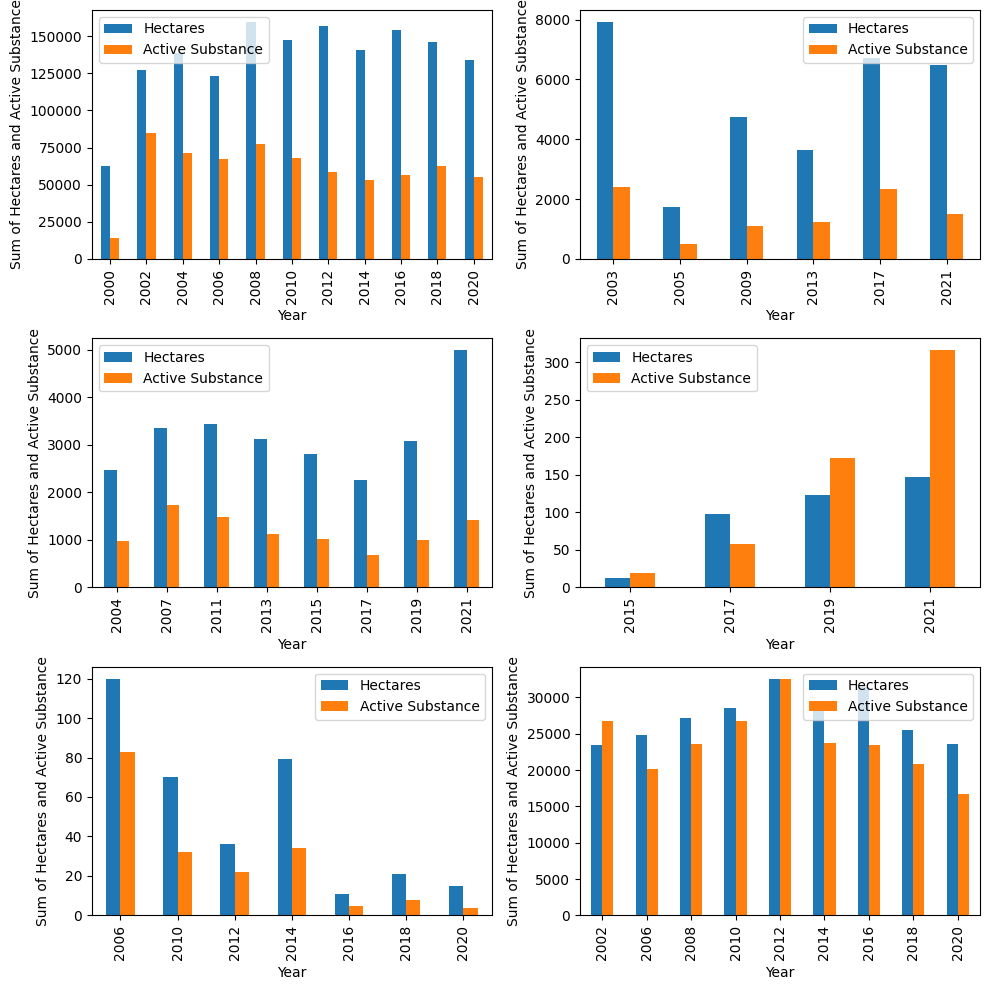

In [97]:

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
i = 0
for crop_type, group in df.groupby(by="Crop Type"):
    aggregated_data = group.groupby("Year").agg({'Hectares': 'sum', 'Active Substance': 'sum'})
    ax = axs[i//2, i%2]
    aggregated_data.plot(kind="bar", ax=ax)
    ax.set_xlabel("Year")
    ax.set_ylabel("Sum of Hectares and Active Substance")
    plot_title = crop_type
    ax.legend()
    i += 1

plt.tight_layout()
plot_filename = os.path.join('output_plots', 'subplot_IR.png')
plt.savefig(plot_filename,  dpi=1000)

plt.show()


**Hectares of fungicides used in each year for different crop types**

In [156]:
grouped_data = df.groupby(["Year", "Crop Type"]).agg({'Hectares': "sum", 'Active Substance': 'sum'})
grouped_data

Hectares  Active Substance
Year Crop Type                                          
2000 Arable_crops               253303             55965
2002 Arable_crops               509626            340703
     Top_soft_fruit              93858            106990
2003 Grassland_fodder_crops      31719              9649
2004 Arable_crops               557006            284407
     Outdoor_vegetable_crops      4972              1972
2005 Grassland_fodder_crops       7003              2006
2006 Arable_crops               492506            269025
     Soft_fruit                    510               364
     Top_soft_fruit              49637             40234
2007 Outdoor_vegetable_crops      7121              3786
2008 Arable_crops               638939            309257
     Top_soft_fruit              54381             47093
2009 Grassland_fodder_crops      18948              4429
2010 Arable_crops               295571            135766
     Soft_fruit                    151                72
     Top_soft_fruit              57188             53591
2011 Outdoor_vegetable_crops     13867              5999
2012 Arable_crops               628662            234653
     Soft_fruit                     85                51
     Top_soft_fruit              65012             65209
2013 Grassland_fodder_crops      16192              5846
     Outdoor_vegetable_crops     12638              4606
2014 Arable_crops               562674            212644
     Soft_fruit                    165                79
     Top_soft_fruit              57196             47496
2015 Outdoor_vegetable_crops      5620              2055
     Protected_crops                25                39
2016 Arable_crops               618346            226155
     Soft_fruit                     24                13
     Top_soft_fruit              62774             46880
2017 Grassland_fodder_crops      13474              4719
     Outdoor_vegetable_crops      4534              1375
     Protected_crops               203               121
2018 Arable_crops               585637            249759
     Soft_fruit                     49                21
     Top_soft_fruit              51053             41805
2019 Outdoor_vegetable_crops      6172              1967
     Protected_crops               259               352
2020 Arable_crops               536253            220215
     Soft_fruit                     35                12
     Top_soft_fruit              94348             67146
2021 Grassland_fodder_crops      12963              3007
     Outdoor_vegetable_crops     10001              2865
     Protected_crops               303               642

In [158]:
pdata = df.pivot_table(index="Year", columns="Crop Type", values="Hectares", aggfunc="sum")
pdata

Crop Type,Arable_crops,Grassland_fodder_crops,Outdoor_vegetable_crops,Protected_crops,Soft_fruit,Top_soft_fruit
Year,,,,,,
2000,253303.0,NaN,NaN,NaN,NaN,NaN
2002,509626.0,NaN,NaN,NaN,NaN,93858.0
2003,NaN,31719.0,NaN,NaN,NaN,NaN
2004,557006.0,NaN,4972.0,NaN,NaN,NaN
2005,NaN,7003.0,NaN,NaN,NaN,NaN
2006,492506.0,NaN,NaN,NaN,510.0,49637.0
2007,NaN,NaN,7121.0,NaN,NaN,NaN
2008,638939.0,NaN,NaN,NaN,NaN,54381.0
2009,NaN,18948.0,NaN,NaN,NaN,NaN


In [159]:
pdata.iloc[:, 0:2] = pdata.iloc[:, 0:2].shift(periods=1, axis= 0)
pdata

Crop Type,Arable_crops,Grassland_fodder_crops,Outdoor_vegetable_crops,Protected_crops,Soft_fruit,Top_soft_fruit
Year,,,,,,
2000,NaN,NaN,NaN,NaN,NaN,NaN
2002,253303.0,NaN,NaN,NaN,NaN,93858.0
2003,509626.0,NaN,NaN,NaN,NaN,NaN
2004,NaN,31719.0,4972.0,NaN,NaN,NaN
2005,557006.0,NaN,NaN,NaN,NaN,NaN
2006,NaN,7003.0,NaN,NaN,510.0,49637.0
2007,492506.0,NaN,7121.0,NaN,NaN,NaN
2008,NaN,NaN,NaN,NaN,NaN,54381.0
2009,638939.0,NaN,NaN,NaN,NaN,NaN


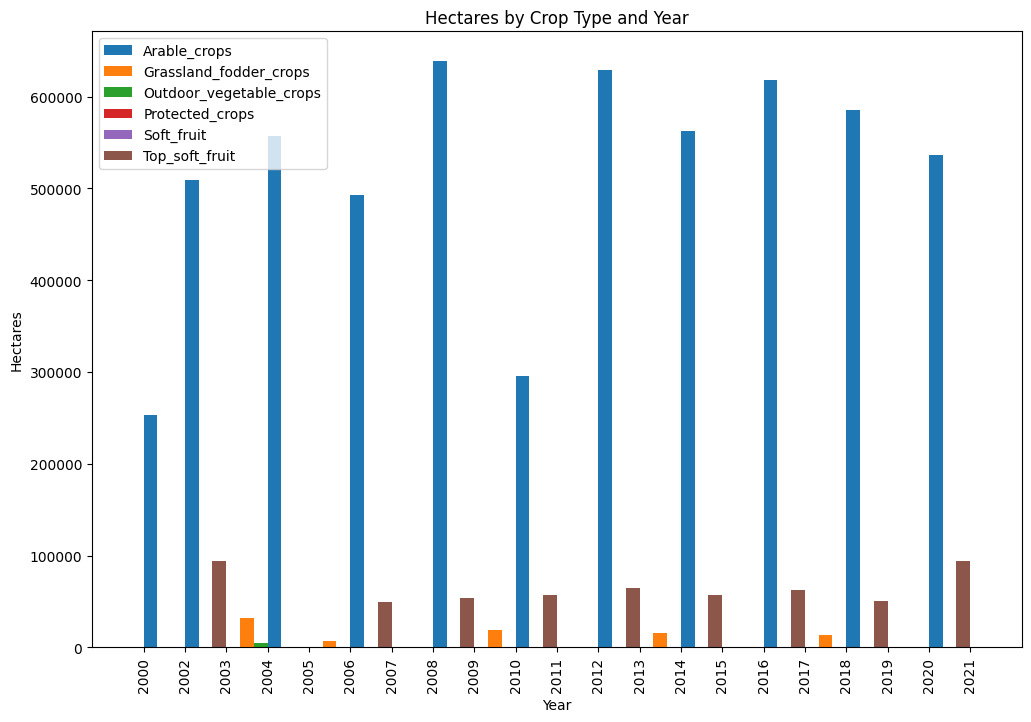

In [160]:
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
pdata.plot(kind="bar", ax=ax, width=2, color=colors)

ax.set_xlabel('Year')
ax.set_ylabel('Hectares')
ax.set_title('Hectares by Crop Type and Year')

ax.legend()

plt.show()


In [115]:

# grouped_year = df.groupby("Year").agg({"Hectares": "sum"})
# plt.figure(figsize=(16, 12))
# ax = sns.barplot(data=df, x="Year", y="Hectares", hue="Crop Type")
# ax.set_xlabel('Year')
# ax.set_ylabel('Hectares')
# ax.set_title('Hectares by Crop Type and Year')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

**A line graph showing the density of fungicide use per year for different crop types**

In [136]:
df

,Year,Crop Type,Crop,Fungicide,Hectares,Active Substance
0,2000,Arable_crops,Springbarley,Azoxystrobin,2731,449
1,2000,Arable_crops,Undersownbarley,Azoxystrobin,0,0
2,2000,Arable_crops,Winterbarley,Azoxystrobin,1946,353
3,2000,Arable_crops,Springwheat,Azoxystrobin,166,31
4,2000,Arable_crops,Winterwheat,Azoxystrobin,3861,621
...,...,...,...,...,...,...
14104,2013,Vegetable_crops,Parsnip,Allfungicides,584,239
14105,2013,Vegetable_crops,Peas&beans,Allfungicides,42,13
14106,2013,Vegetable_crops,Turnip&swede,Allfungicides,6,1
14107,2013,Vegetable_crops,Allcurcurbit,Allfungicides,0,0


In [161]:
grouped_data = df.groupby(["Year", "Crop Type"]).agg({'Hectares': "sum", 'Active Substance': 'sum'})
grouped_data

Hectares  Active Substance
Year Crop Type                                          
2000 Arable_crops               253303             55965
2002 Arable_crops               509626            340703
     Top_soft_fruit              93858            106990
2003 Grassland_fodder_crops      31719              9649
2004 Arable_crops               557006            284407
     Outdoor_vegetable_crops      4972              1972
2005 Grassland_fodder_crops       7003              2006
2006 Arable_crops               492506            269025
     Soft_fruit                    510               364
     Top_soft_fruit              49637             40234
2007 Outdoor_vegetable_crops      7121              3786
2008 Arable_crops               638939            309257
     Top_soft_fruit              54381             47093
2009 Grassland_fodder_crops      18948              4429
2010 Arable_crops               295571            135766
     Soft_fruit                    151                72
     Top_soft_fruit              57188             53591
2011 Outdoor_vegetable_crops     13867              5999
2012 Arable_crops               628662            234653
     Soft_fruit                     85                51
     Top_soft_fruit              65012             65209
2013 Grassland_fodder_crops      16192              5846
     Outdoor_vegetable_crops     12638              4606
2014 Arable_crops               562674            212644
     Soft_fruit                    165                79
     Top_soft_fruit              57196             47496
2015 Outdoor_vegetable_crops      5620              2055
     Protected_crops                25                39
2016 Arable_crops               618346            226155
     Soft_fruit                     24                13
     Top_soft_fruit              62774             46880
2017 Grassland_fodder_crops      13474              4719
     Outdoor_vegetable_crops      4534              1375
     Protected_crops               203               121
2018 Arable_crops               585637            249759
     Soft_fruit                     49                21
     Top_soft_fruit              51053             41805
2019 Outdoor_vegetable_crops      6172              1967
     Protected_crops               259               352
2020 Arable_crops               536253            220215
     Soft_fruit                     35                12
     Top_soft_fruit              94348             67146
2021 Grassland_fodder_crops      12963              3007
     Outdoor_vegetable_crops     10001              2865
     Protected_crops               303               642

In [162]:
grouped_data["Active Substance per Hectare"] = grouped_data["Active Substance"] / grouped_data["Hectares"]
grouped_data

Hectares  Active Substance  \
Year Crop Type                                             
2000 Arable_crops               253303             55965   
2002 Arable_crops               509626            340703   
     Top_soft_fruit              93858            106990   
2003 Grassland_fodder_crops      31719              9649   
2004 Arable_crops               557006            284407   
     Outdoor_vegetable_crops      4972              1972   
2005 Grassland_fodder_crops       7003              2006   
2006 Arable_crops               492506            269025   
     Soft_fruit                    510               364   
     Top_soft_fruit              49637             40234   
2007 Outdoor_vegetable_crops      7121              3786   
2008 Arable_crops               638939            309257   
     Top_soft_fruit              54381             47093   
2009 Grassland_fodder_crops      18948              4429   
2010 Arable_crops               295571            135766   
     Soft_fruit                    151                72   
     Top_soft_fruit              57188             53591   
2011 Outdoor_vegetable_crops     13867              5999   
2012 Arable_crops               628662            234653   
     Soft_fruit                     85                51   
     Top_soft_fruit              65012             65209   
2013 Grassland_fodder_crops      16192              5846   
     Outdoor_vegetable_crops     12638              4606   
2014 Arable_crops               562674            212644   
     Soft_fruit                    165                79   
     Top_soft_fruit              57196             47496   
2015 Outdoor_vegetable_crops      5620              2055   
     Protected_crops                25                39   
2016 Arable_crops               618346            226155   
     Soft_fruit                     24                13   
     Top_soft_fruit              62774             46880   
2017 Grassland_fodder_crops      13474              4719   
     Outdoor_vegetable_crops      4534              1375   
     Protected_crops               203               121   
2018 Arable_crops               585637            249759   
     Soft_fruit                     49                21   
     Top_soft_fruit              51053             41805   
2019 Outdoor_vegetable_crops      6172              1967   
     Protected_crops               259               352   
2020 Arable_crops               536253            220215   
     Soft_fruit                     35                12   
     Top_soft_fruit              94348             67146   
2021 Grassland_fodder_crops      12963              3007   
     Outdoor_vegetable_crops     10001              2865   
     Protected_crops               303               642   

                              Active Substance per Hectare  
Year Crop Type                                              
2000 Arable_crops                                 0.220941  
2002 Arable_crops                                 0.668535  
     Top_soft_fruit                               1.139913  
2003 Grassland_fodder_crops                       0.304203  
2004 Arable_crops                                 0.510600  
     Outdoor_vegetable_crops                      0.396621  
2005 Grassland_fodder_crops                       0.286449  
2006 Arable_crops                                 0.546237  
     Soft_fruit                                   0.713725  
     Top_soft_fruit                               0.810565  
2007 Outdoor_vegetable_crops                      0.531667  
2008 Arable_crops                                 0.484016  
     Top_soft_fruit                               0.865983  
2009 Grassland_fodder_crops                       0.233745  
2010 Arable_crops                                 0.459335  
     Soft_fruit                                   0.476821  
     Top_soft_fruit                               0.937102  
2011 Outdoor_vegetable_crops                      

In [163]:
grouped_data = grouped_data.reset_index()
grouped_data

,Year,Crop Type,Hectares,Active Substance,Active Substance per Hectare
0,2000,Arable_crops,253303,55965,0.220941
1,2002,Arable_crops,509626,340703,0.668535
2,2002,Top_soft_fruit,93858,106990,1.139913
3,2003,Grassland_fodder_crops,31719,9649,0.304203
4,2004,Arable_crops,557006,284407,0.510600
5,2004,Outdoor_vegetable_crops,4972,1972,0.396621
6,2005,Grassland_fodder_crops,7003,2006,0.286449
7,2006,Arable_crops,492506,269025,0.546237
8,2006,Soft_fruit,510,364,0.713725
9,2006,Top_soft_fruit,49637,40234,0.810565


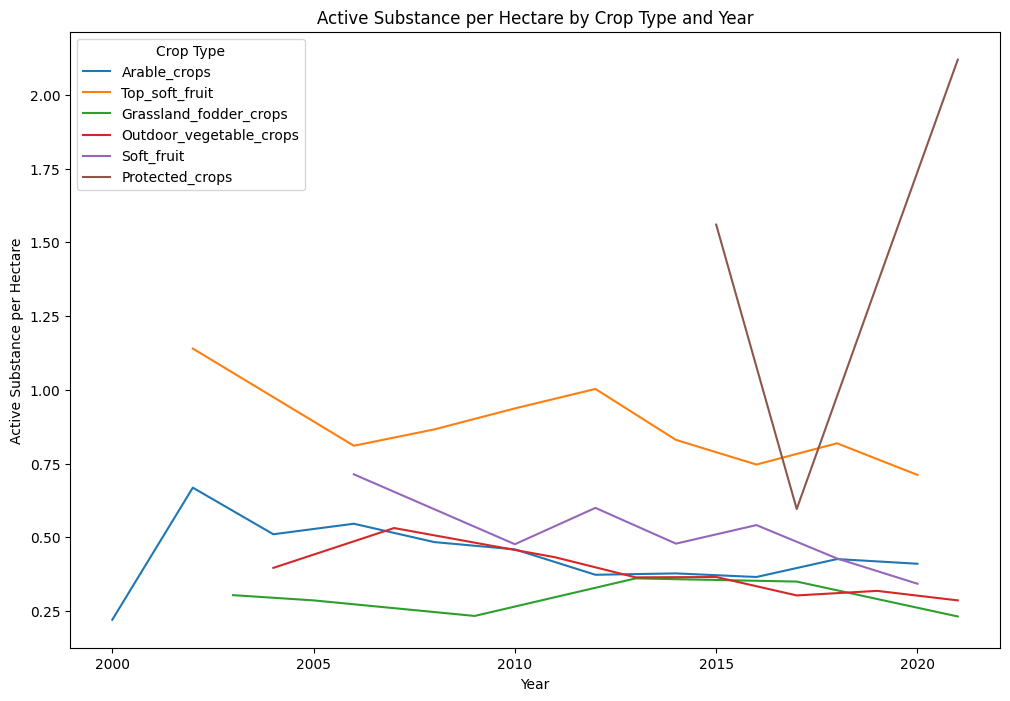

In [164]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=grouped_data, x="Year", y="Active Substance per Hectare", hue="Crop Type", ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Active Substance per Hectare')
ax.set_title('Active Substance per Hectare by Crop Type and Year')
plt.show()


**A bar chart showing the top 10 use cycles (last year - first year) of all fungicides used**

In [14]:
min_year = df.groupby("Fungicide")["Year"].min()
max_year = df.groupby("Fungicide")["Year"].max()
result = pd.concat([min_year, max_year], axis=1)
result.columns = ["First Year", "Last Year"]

In [15]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, *Sulphur to Zineb
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   First Year  216 non-null    int64
 1   Last Year   216 non-null    int64
dtypes: int64(2)
memory usage: 5.1+ KB


In [16]:
result["Year Range"] = result["Last Year"] - result["First Year"]
result.sort_values(by="Year Range", ascending=False, inplace=True)
result

,First Year,Last Year,Year Range
Fungicide,,,
Azoxystrobin,2000,2021,21
Chlorothalonil,2000,2021,21
Fenpropimorph,2000,2021,21
Epoxiconazole,2000,2021,21
Tebuconazole,2000,2021,21
...,...,...,...
Spiroxamine,2000,2000,0
Tetraconazole,2000,2000,0
Triadimenol/tridemorph,2000,2000,0


In [17]:
top10_fungicide = list(result.index[:10])
top10_fungicide

['Azoxystrobin',
 'Chlorothalonil',
 'Fenpropimorph',
 'Epoxiconazole',
 'Tebuconazole',
 'Mancozeb',
 'Cyprodinil',
 'Sulphur',
 'Quinoxyfen',
 'Trifloxystrobin']

In [18]:
top_10_df = df[df["Fungicide"].isin(top10_fungicide)]
top_10_df

,Year,Crop Type,Crop,Fungicide,Hectares,Active Substance
0,2000,Arable_crops,Springbarley,Azoxystrobin,2731,449
1,2000,Arable_crops,Undersownbarley,Azoxystrobin,0,0
2,2000,Arable_crops,Winterbarley,Azoxystrobin,1946,353
3,2000,Arable_crops,Springwheat,Azoxystrobin,166,31
4,2000,Arable_crops,Winterwheat,Azoxystrobin,3861,621
...,...,...,...,...,...,...
14051,2013,Outdoor_vegetable_crops,Parsley,Tebuconazole,0,0
14052,2013,Outdoor_vegetable_crops,Parsnip,Tebuconazole,91,22
14053,2013,Outdoor_vegetable_crops,Peas&beans,Tebuconazole,4,1
14054,2013,Outdoor_vegetable_crops,Turnip&swede,Tebuconazole,4,0


In [19]:
top10_fungicide

['Azoxystrobin',
 'Chlorothalonil',
 'Fenpropimorph',
 'Epoxiconazole',
 'Tebuconazole',
 'Mancozeb',
 'Cyprodinil',
 'Sulphur',
 'Quinoxyfen',
 'Trifloxystrobin']

In [20]:
top_10_df.groupby(["Year", "Fungicide"]).agg({'Hectares': 'sum'})

Hectares
Year Fungicide               
2000 Azoxystrobin        9535
     Chlorothalonil       690
     Cyprodinil          2587
     Epoxiconazole       3302
     Fenpropimorph       4198
...                       ...
2021 Azoxystrobin         797
     Chlorothalonil       184
     Epoxiconazole        137
     Fenpropimorph        106
     Tebuconazole         173

[154 rows x 1 columns]

In [25]:
top_10_df = top_10_df.pivot_table(index="Year", columns="Fungicide", values="Hectares")
top_10_df

Fungicide,Azoxystrobin,Chlorothalonil,Cyprodinil,Epoxiconazole,Fenpropimorph,Mancozeb,Quinoxyfen,Sulphur,Tebuconazole,Trifloxystrobin
Year,,,,,,,,,,
2000,794.583333,57.500000,215.583333,275.166667,349.833333,1.500000,80.166667,25.750000,259.833333,309.833333
2002,527.875000,45.000000,168.937500,433.437500,286.937500,794.428571,69.625000,10.750000,117.812500,255.437500
2003,50.153846,NaN,NaN,50.153846,12.615385,25.769231,NaN,NaN,185.615385,NaN
2004,413.230769,388.538462,140.875000,1015.437500,154.807692,241.538462,27.000000,NaN,108.384615,346.000000
2005,8.153846,19.153846,NaN,39.153846,NaN,NaN,NaN,NaN,NaN,NaN
2006,399.200000,422.440000,21.437500,551.375000,170.400000,661.904762,21.840000,1.285714,137.125000,149.062500
2007,49.700000,17.000000,NaN,NaN,18.100000,0.200000,NaN,10.900000,76.100000,NaN
2008,351.153846,1423.461538,74.230769,717.307692,397.615385,609.533333,10.000000,124.500000,282.133333,31.923077
2009,5.818182,63.272727,NaN,72.545455,37.818182,NaN,NaN,NaN,NaN,NaN


C:\Windows\Temp\ipykernel_15060\1991536041.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[row, col].legend()


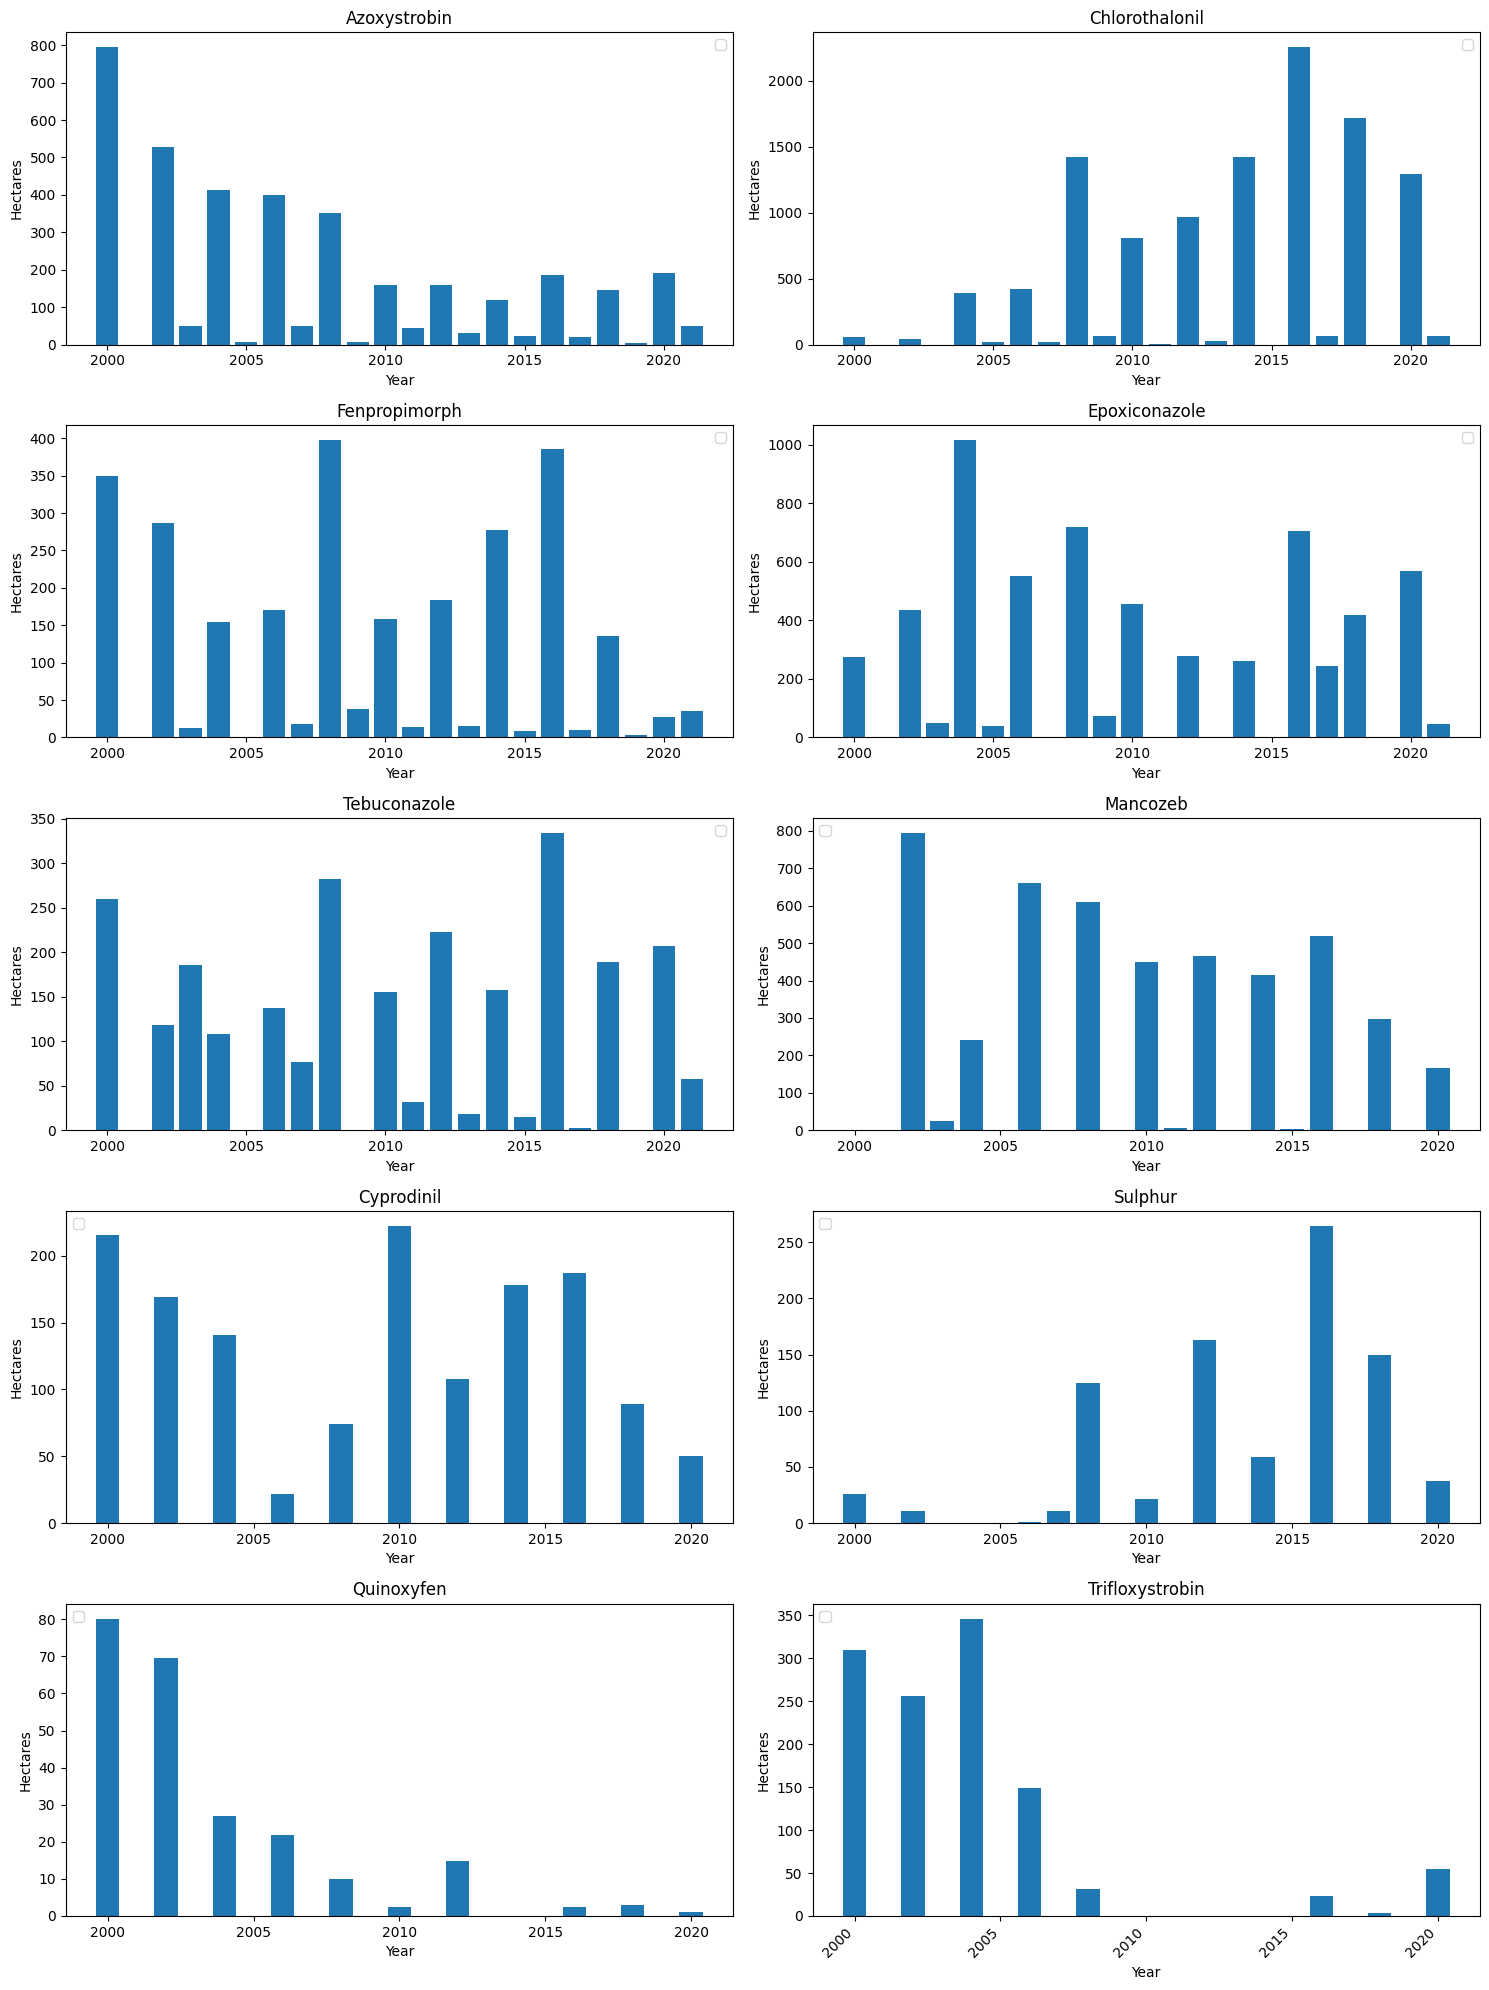

In [26]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.3)
for i, fungicide in enumerate(top10_fungicide):
    row = i // 2
    col = i % 2
    fungicide_df = top_10_df[fungicide]
    axs[row, col].bar(fungicide_df.index, fungicide_df.values)
    axs[row, col].set_title(fungicide)
    plt.xticks(rotation=45, ha='right')
    axs[row, col].set_xlabel('Year')
    axs[row, col].set_ylabel('Hectares')
    axs[row, col].legend()
plt.tight_layout()
plt.show()

**Use a line graph to show the change in the number of fungicides used per year in different crop types**

In [167]:
df.head()

,Year,Crop Type,Crop,Fungicide,Hectares,Active Substance
0,2000,Arable_crops,Springbarley,Azoxystrobin,2731,449
1,2000,Arable_crops,Undersownbarley,Azoxystrobin,0,0
2,2000,Arable_crops,Winterbarley,Azoxystrobin,1946,353
3,2000,Arable_crops,Springwheat,Azoxystrobin,166,31
4,2000,Arable_crops,Winterwheat,Azoxystrobin,3861,621


In [168]:
data = df.groupby(["Crop Type", "Year"])["Fungicide"].nunique()
data

Crop Type                Year
Arable_crops             2000    43
                         2002    57
                         2004    52
                         2006    56
                         2008    61
                         2010    59
                         2012    68
                         2014    64
                         2016    68
                         2018    65
                         2020    69
Grassland_fodder_crops   2003    13
                         2005     8
                         2009    17
                         2013    20
                         2017    23
                         2021    23
Outdoor_vegetable_crops  2004    23
                         2007    20
                         2011    23
                         2013    25
                         2015    22
                         2017    19
                         2019    17
                         2021    15
Protected_crops          2015     8
                         2017    1

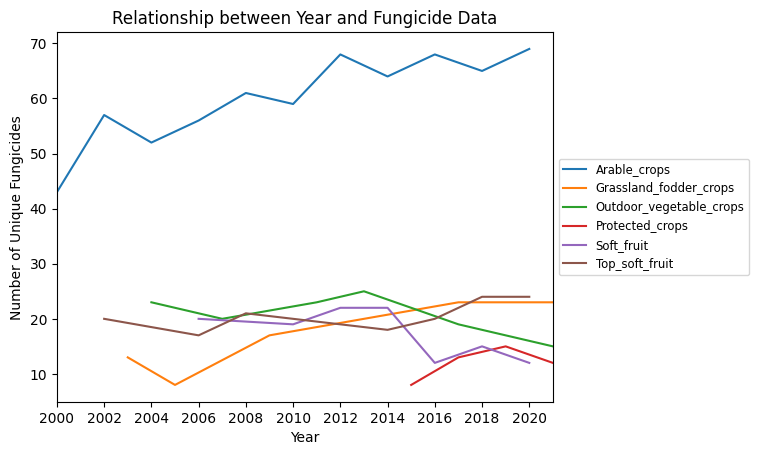

In [170]:
sns.lineplot(data=data.reset_index(), x="Year", y="Fungicide", hue="Crop Type")
plt.xlabel('Year')
plt.ylabel('Number of Unique Fungicides')
plt.title('Relationship between Year and Fungicide Data')
plt.legend(fontsize='small', loc='center left', bbox_to_anchor=(1, 0.5))
# Set x-axis limits
plt.xlim(2000, 2021)
plt.xticks(range(2000, 2022, 2))
# plt.savefig('output_plots/relationship_between_year_and_fungicide_data.png', dpi=1000, bbox_inches='tight')
plt.show()

In [30]:
from statsmodels.tsa.arima.model import ARIMA

In [32]:
grouped_data = df.groupby('Year').agg({'Hectares': 'sum', 'Active Substance': 'sum'})

model = ARIMA(grouped_data["Hectares"], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\tingf\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\tingf\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\tingf\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\tingf\AppData\Local\Programs\Python\Python39\lib\sit

                               SARIMAX Results                                
Dep. Variable:               Hectares   No. Observations:                   21
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -235.829
Date:                Thu, 17 Oct 2024   AIC                            477.659
Time:                        14:27:21   BIC                            480.646
Sample:                             0   HQIC                           478.242
                                 - 21                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000      0.134     -7.470      0.000      -1.262      -0.738
ma.L1         -0.7579      0.138     -5.512      0.000      -1.027      -0.488
sigma2       9.62e+08   1.29e-10   7.46e+18      0.0

In [33]:
model = ARIMA(grouped_data['Active Substance'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:       Active Substance   No. Observations:                   21
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -229.054
Date:                Thu, 17 Oct 2024   AIC                            464.108
Time:                        14:27:32   BIC                            467.095
Sample:                             0   HQIC                           464.691
                                 - 21                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9180      0.163     -5.645      0.000      -1.237      -0.599
ma.L1         -1.0000      0.147     -6.812      0.000      -1.288      -0.712
sigma2      4.461e+08   3.29e-10   1.36e+18      0.0

c:\Users\tingf\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\tingf\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\tingf\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
